In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read raw data csv file
data = pd.read_csv('data/Renewable_raw.csv')

In [3]:
#data overview
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [4]:
print(data)

                       Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
0       2017-01-01 00:00:00                 0   0.0   1.6      1021       100   
1       2017-01-01 00:15:00                 0   0.0   1.6      1021       100   
2       2017-01-01 00:30:00                 0   0.0   1.6      1021       100   
3       2017-01-01 00:45:00                 0   0.0   1.6      1021       100   
4       2017-01-01 01:00:00                 0   0.0   1.7      1020       100   
...                     ...               ...   ...   ...       ...       ...   
196771  2022-08-31 16:45:00               118  23.7  18.6      1023        57   
196772  2022-08-31 17:00:00                82  15.6  18.5      1023        61   
196773  2022-08-31 17:15:00                51   8.0  18.5      1023        61   
196774  2022-08-31 17:30:00                24   2.1  18.5      1023        61   
196775  2022-08-31 17:45:00                 0   0.0  18.5      1023        61   

        wind_speed  rain_1h

In [5]:
#Column explanation

#Energy delta - The difference in energy consumption in Watt-hours (Wh) from the previous timestamp to the current timestamp.
#GHI - Global Horizontal Irradiance in Watts per square meter (W/m²) measured by a pyranometer
#rain_1h - The amount of precipitation in millimeters (mm) measured over the past hour.
#snow_1h - The amount of snowfall in millimeters

In [6]:
data.dtypes

Time                       object
Energy delta[Wh]            int64
GHI                       float64
temp                      float64
pressure                    int64
humidity                    int64
wind_speed                float64
rain_1h                   float64
snow_1h                   float64
clouds_all                  int64
isSun                       int64
sunlightTime                int64
dayLength                   int64
SunlightTime/daylength    float64
weather_type                int64
hour                        int64
month                       int64
dtype: object

In [7]:
data.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [8]:
#handling missing value
data = data.dropna()

In [9]:
data.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [10]:
print(data)

                       Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
0       2017-01-01 00:00:00                 0   0.0   1.6      1021       100   
1       2017-01-01 00:15:00                 0   0.0   1.6      1021       100   
2       2017-01-01 00:30:00                 0   0.0   1.6      1021       100   
3       2017-01-01 00:45:00                 0   0.0   1.6      1021       100   
4       2017-01-01 01:00:00                 0   0.0   1.7      1020       100   
...                     ...               ...   ...   ...       ...       ...   
196771  2022-08-31 16:45:00               118  23.7  18.6      1023        57   
196772  2022-08-31 17:00:00                82  15.6  18.5      1023        61   
196773  2022-08-31 17:15:00                51   8.0  18.5      1023        61   
196774  2022-08-31 17:30:00                24   2.1  18.5      1023        61   
196775  2022-08-31 17:45:00                 0   0.0  18.5      1023        61   

        wind_speed  rain_1h

In [11]:
#feature engineering - convert Time datatype to datatime
data['Time'] = pd.to_datetime(data['Time'])

In [12]:
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [13]:
data.dtypes

Time                      datetime64[ns]
Energy delta[Wh]                   int64
GHI                              float64
temp                             float64
pressure                           int64
humidity                           int64
wind_speed                       float64
rain_1h                          float64
snow_1h                          float64
clouds_all                         int64
isSun                              int64
sunlightTime                       int64
dayLength                          int64
SunlightTime/daylength           float64
weather_type                       int64
hour                               int64
month                              int64
dtype: object

In [14]:
#filter out energy delta that is not 0
energy_data = data[data['Energy delta[Wh]'] != 0]

In [15]:
energy_data

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
32,2017-01-01 08:00:00,5,10.6,3.5,1016,99,6.0,0.0,0.0,98,1,60,450,0.13,4,8,1
33,2017-01-01 08:15:00,33,6.0,3.5,1016,99,6.0,0.0,0.0,98,1,75,450,0.17,4,8,1
34,2017-01-01 08:30:00,44,2.8,3.5,1016,99,6.0,0.0,0.0,98,1,90,450,0.20,4,8,1
35,2017-01-01 08:45:00,61,3.1,3.5,1016,99,6.0,0.0,0.0,98,1,105,450,0.23,4,8,1
36,2017-01-01 09:00:00,65,3.5,3.6,1016,97,6.2,0.0,0.0,100,1,120,450,0.27,4,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196770,2022-08-31 16:30:00,157,31.9,18.6,1023,57,3.8,0.0,0.0,52,1,765,825,0.93,3,16,8
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8


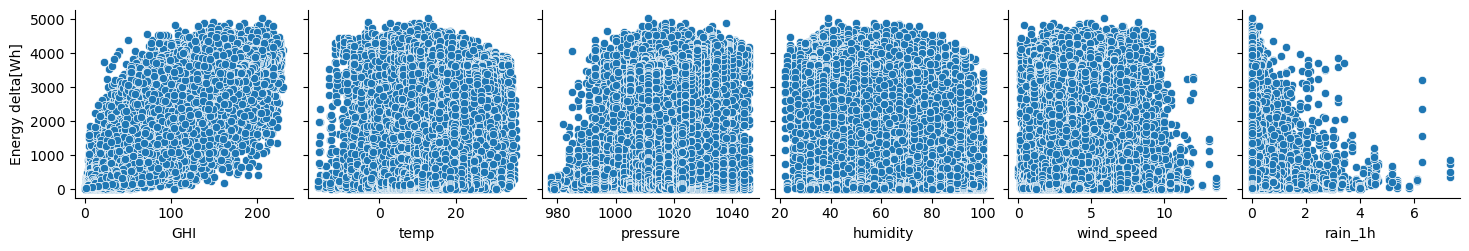

In [16]:
sns.pairplot(data=energy_data, y_vars=['Energy delta[Wh]'], x_vars=['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h'], kind='scatter')
plt.show()

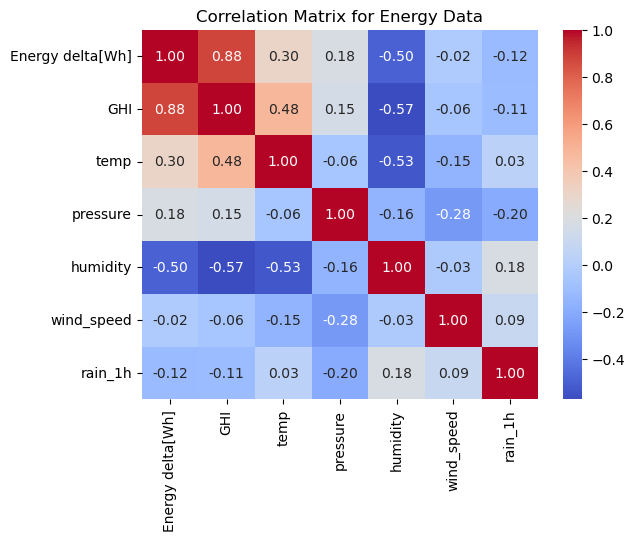

In [17]:
#correlation matrix
corr_matrix = energy_data[['Energy delta[Wh]','GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h']].corr()

# heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Energy Data')
plt.show()

### Cross validation to choose the best model

In [25]:
#split data into train and test data
from sklearn.model_selection import train_test_split

X = energy_data[['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h']]
y = energy_data['Energy delta[Wh]'] 

# Assuming you have features 'X' and labels 'y' already prepared
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [23]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
kfolds_regresssion = KFold(n_splits = 10, random_state = 42, shuffle = True)
linear_regresssion_model = LinearRegression()

In [27]:
r2_model_1_cv = cross_val_score(linear_regresssion_model, X_train, y_train, cv=kfolds_regresssion)

print("Linear Regression: \n")
print("r squared of 10-folds:",r2_model_1_cv,"(mean r squared:",np.mean(r2_model_1_cv),")")

Linear Regression: 

r squared of 10-folds: [0.79483909 0.79297631 0.8066558  0.80453663 0.80801181 0.7984753
 0.79438829 0.79813543 0.79558825 0.80575901] (mean r squared: 0.7999365921766024 )


KNN regression

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [29]:
# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [30]:
r2_model_2_cv = cross_val_score(knn_regressor, X_train, y_train, cv=kfolds_regresssion)

print("KNN Regression: \n")
print("r squared of 10-folds:",r2_model_2_cv,"(mean r squared:",np.mean(r2_model_2_cv),")")

KNN Regression: 

r squared of 10-folds: [0.80856401 0.80641902 0.81721653 0.81964656 0.81806666 0.82013794
 0.80260182 0.80374703 0.81440869 0.82062851] (mean r squared: 0.8131436767983008 )


Decision Tree

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [32]:
decisiontree_regressor = DecisionTreeRegressor(random_state=0)
r2_model_3_cv = cross_val_score(decisiontree_regressor, X_train, y_train, cv=kfolds_regresssion)

print("Decision Tree Regression: \n")
print("r squared of 10-folds:",r2_model_3_cv,"(mean r squared:",np.mean(r2_model_3_cv),")")

Decision Tree Regression: 

r squared of 10-folds: [0.71386283 0.70393665 0.70934414 0.71033169 0.71673905 0.71864904
 0.70837981 0.7179838  0.71277724 0.71050635] (mean r squared: 0.7122510606547041 )


Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
randomforest_regressor = RandomForestRegressor(n_estimators=100, random_state= 42, max_features = 2)
r2_model_4_cv = cross_val_score(randomforest_regressor, X_train, y_train, cv=kfolds_regresssion)

print("Random Forest Regression: \n")
print("r squared of 10-folds:",r2_model_4_cv,"(mean r squared:",np.mean(r2_model_4_cv),")")

Random Forest Regression: 

r squared of 10-folds: [0.87067404 0.87051325 0.88327897 0.88248912 0.88253463 0.88156556
 0.87323478 0.87074266 0.87889302 0.8789123 ] (mean r squared: 0.8772838337986995 )


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Maximum number of levels in each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of data points placed in a node before the node is split
    'min_samples_leaf': [1, 2, 4],  # Minimum number of data points allowed in a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider at every split
}

In [49]:
grid_search = GridSearchCV(estimator=randomforest_regressor, param_grid=param_grid, cv=kfolds_regresssion, 
                           scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


In [51]:
best_rf = grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [52]:
print("Best parameters found:", grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Neural Network model

### ARIMA Time Series Analysis

In [60]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

In [18]:
# separate dataset by year
print("From Time : ",data['Time'].min())
print("To Time   : ",data['Time'].max())

From Time :  2017-01-01 00:00:00
To Time   :  2022-08-31 17:45:00


In [54]:
#create dataset by year
df1 = energy_data[['Time','Energy delta[Wh]','GHI']].copy('Deep')
df1.set_index('Time', inplace=True)
df_2017 = df1['2017-01-01':'2017-12-31']
df_2018 = df1['2018-01-01':'2018-12-31']
df_2019 = df1['2019-01-01':'2019-12-31']
df_2020 = df1['2020-01-01':'2020-12-31']
df_2021 = df1['2021-01-01':'2021-12-31']
df_2022 = df1['2022-01-01':'2022-08-31']
print(df_2017)

                     Energy delta[Wh]   GHI
Time                                       
2017-01-01 08:00:00                 5  10.6
2017-01-01 08:15:00                33   6.0
2017-01-01 08:30:00                44   2.8
2017-01-01 08:45:00                61   3.1
2017-01-01 09:00:00                65   3.5
...                               ...   ...
2017-12-31 12:45:00               126  10.1
2017-12-31 13:00:00               178   8.8
2017-12-31 13:15:00               106  17.0
2017-12-31 13:30:00                54  17.1
2017-12-31 13:45:00                11  12.2

[16582 rows x 2 columns]


In [61]:
#Stationarity Check - 2017 for example - yes, time series is stationary
data = df_2017[['Energy delta[Wh]', 'GHI']].copy()

# Test for stationarity of the 'Energy delta[Wh]' column
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Apply stationarity test
test_stationarity(data['Energy delta[Wh]'])


Results of Dickey-Fuller Test:
Test Statistic                -1.395326e+01
p-value                        4.660561e-26
#Lags Used                     4.300000e+01
Number of Observations Used    1.653800e+04
Critical Value (1%)           -3.430745e+00
Critical Value (5%)           -2.861715e+00
Critical Value (10%)          -2.566863e+00
dtype: float64


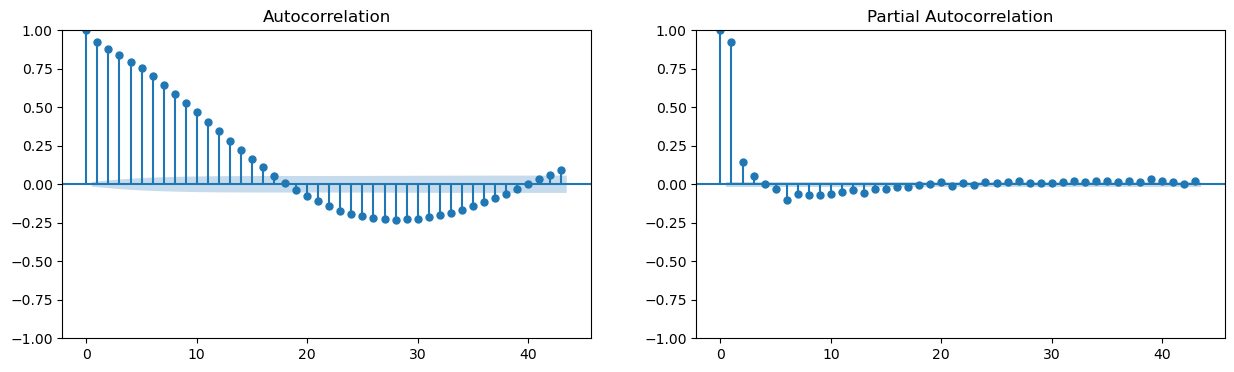

In [63]:
#Determine ARIMA Parameters (p, d, q)
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(data['Energy delta[Wh]'].dropna(), ax=axes[0])  # ACF for q
plot_pacf(data['Energy delta[Wh]'].dropna(), ax=axes[1], method='ywm')  # PACF for p
plt.show()

In [64]:
# Fit an ARIMA model
# Here we assume p=1, d=1, q=1 as a starting example based on hypothetical ACF and PACF analysis
model = ARIMA(data['Energy delta[Wh]'], order=(1, 1, 1), exog=data['GHI'])
model_fit = model.fit()

# Print out the model summary
print(model_fit.summary())

/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Energy delta[Wh]   No. Observations:                16582
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -122713.656
Date:                Mon, 20 May 2024   AIC                         245435.312
Time:                        00:01:46   BIC                         245466.176
Sample:                             0   HQIC                        245445.502
                              - 16582                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GHI           17.6135      0.123    143.683      0.000      17.373      17.854
ar.L1          0.3002      0.009     33.413      0.000       0.283       0.318
ma.L1         -0.7009      0.008    -91.301      0.0

In [65]:
# Forecast
forecast = model_fit.forecast(steps=5, exog=data['GHI'][-5:])  # Forecast the next 5 steps. Adjust 'exog' as per your data's requirement
print(forecast)

16582     13.601441
16583      2.587983
16584    150.586052
16585    153.418259
16586     67.433564
Name: predicted_mean, dtype: float64


/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


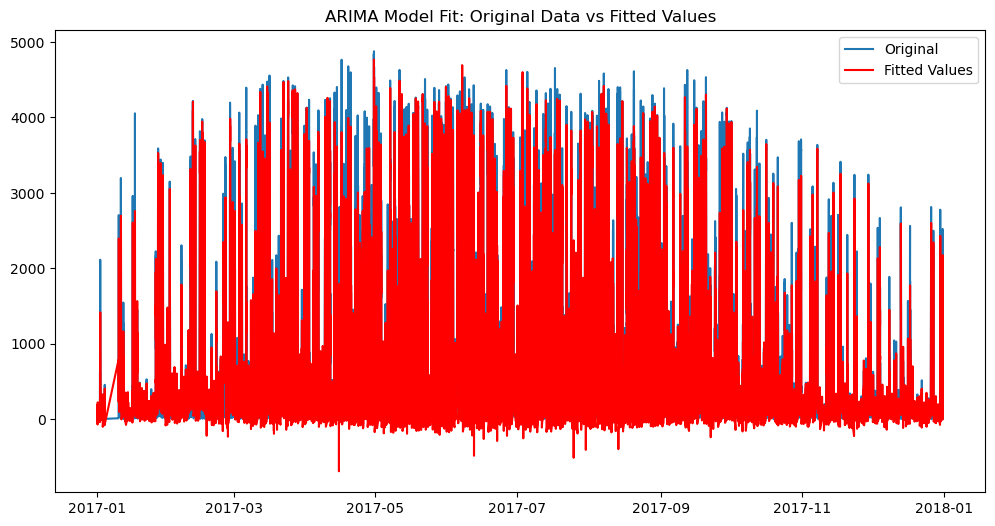

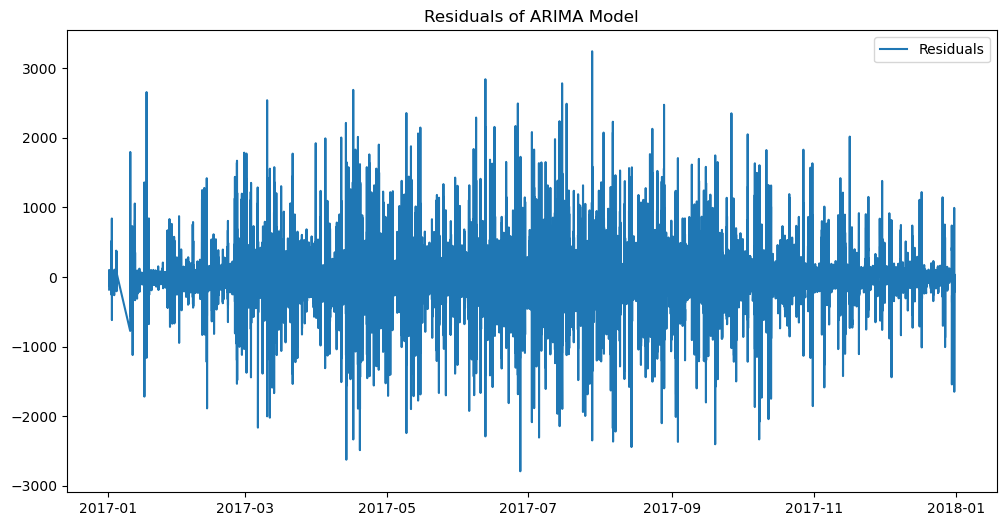

/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/eloiseyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ValueError: too many values to unpack (expected 3)

In [66]:
# Get the predictions and residuals
predictions = model_fit.predict(typ='levels')  # 'typ' set to 'levels' for actual prediction values
residuals = data['Energy delta[Wh]'] - predictions

# Plot original data and fitted values
plt.figure(figsize=(12, 6))
plt.plot(data['Energy delta[Wh]'], label='Original')
plt.plot(predictions, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit: Original Data vs Fitted Values')
plt.legend()
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA Model')
plt.legend()
plt.show()

# Forecasting beyond the current data
n_forecast = 5  # defining number of steps to forecast
forecast, stderr, conf_int = model_fit.forecast(steps=n_forecast, exog=data['GHI'][-n_forecast:], alpha=0.05)  # 95% conf

# Plot the forecast alongside the historical data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Energy delta[Wh]'], label='Historical Data')
future_dates = [data.index[-1] + pd.Timedelta(days=i) for i in range(1, n_forecast + 1)]
plt.plot(future_dates, forecast, color='red', label='Forecast')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast Next 5 Steps')
plt.legend()
plt.show()
